## Kompresimi i Imazheve përmes Zbërthimit të Vlerave Singulare (SVD)
### Autor: Adisa13ORCID 
### ID: 0009-0003-1993-88911. 
### Teoria Matematie në algjebrën lineare
### Singular Value Decomposition (SVD) zbërthen një matricë $A$ (imazhin tonë) në tri matrica të tjera:
### $$A = U \Sigma V^T$$
### $U$: Matrica e vektorëve singulard të majtë (ortogonale).
### $\Sigma$: Matrica diagonale e vlerave singulare (të renditura nga më e madhja te më e vogla).
### $V^T$: Matrica e vektorëve singulard të djathtë (ortogonale).
### 2. Inovacioni përmes "Low-Rank Approximation"Për të kompresuar imazhin, ne mbajmë vetëm $k$ vlerat e para më të rëndësishme të matricës $\Sigma$. Kjo na lejon të rindërtojmë një përafrim të imazhit duke përdorur shumë më pak të dhëna sesa origjinali:
### $$A_k \approx \sum_{i=1}^{k} \sigma_i u_i v_i^T$$

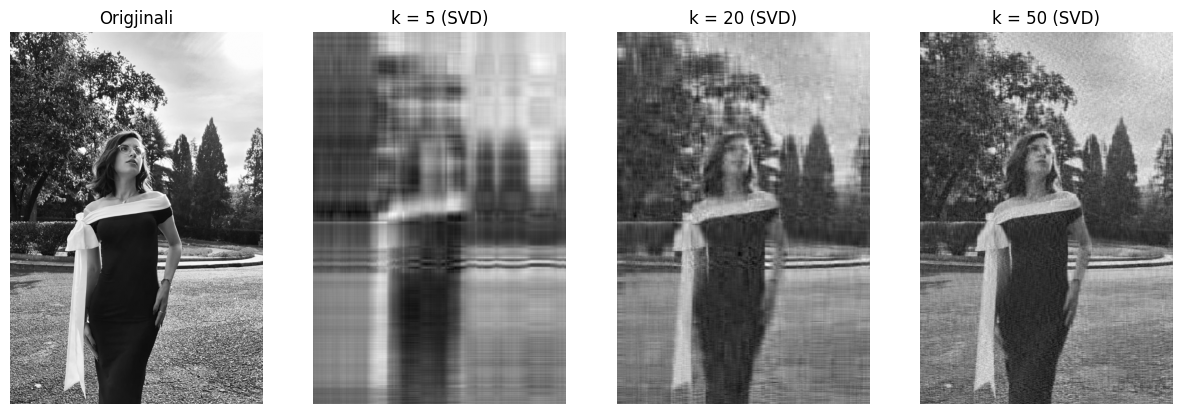

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

def compress_svd(image_path, k):
    """
    Funksioni merr një imazh dhe numrin k të vlerave singulare.
    Kthen imazhin e kompresuar.
    """
    # 1. Hapim imazhin dhe e kthejmë në bardhë-e-zi (Grayscale Matrix)
    if not os.path.exists(image_path):
        print(f"Gabim: Skedari '{image_path}' nuk u gjet!")
        return None
        
    img = Image.open(image_path).convert('L')
    img_mat = np.array(img)
    
    # 2. Zbatimi i SVD (Singular Value Decomposition)
    # U, S, Vt janë matricat që mësuam në teori
    U, S, Vt = np.linalg.svd(img_mat, full_matrices=False)
    
    # 3. Mbajmë vetëm k vlerat e para (Kompresimi)
    S_k = np.diag(S[:k])
    U_k = U[:, :k]
    Vt_k = Vt[:k, :]
    
    # 4. Rindërtojmë imazhin e përafruar
    compressed_mat = np.dot(U_k, np.dot(S_k, Vt_k))
    
    return img_mat, compressed_mat

emri_fotos = 'foto.jpeg' 
k_values = [5, 20, 50] # Do provojmë me 5, 20 dhe 50 vlera singulare

if os.path.exists(emri_fotos):
    original, _ = compress_svd(emri_fotos, 100) # Thjesht për të marrë origjinalin
    
    plt.figure(figsize=(15, 5))
    
    # Shfaq origjinalin
    plt.subplot(1, len(k_values) + 1, 1)
    plt.title("Origjinali")
    plt.imshow(original, cmap='gray')
    plt.axis('off')

    for i, k in enumerate(k_values):
        _, compressed = compress_svd(emri_fotos, k)
        plt.subplot(1, len(k_values) + 1, i + 2)
        plt.title(f"k = {k} (SVD)")
        plt.imshow(compressed, cmap='gray')
        plt.axis('off')

    plt.show()
else:
    print("Kujdes emertimin e fotos")

### Kur mbajmë vetëm 5 vlerat e para singulare, ne marrim "skeletin" e imazhit. Imazhi është shumë i turbullt, por format kryesore (dritë-hija, konturet e mëdha) janë të dallueshme.
### ***Shpjegimi Matematik:*** Vlerat e para singulare ($\sigma_1, \sigma_2...$) mbajnë pjesën më të madhe të "energjisë" ose variancës së matricës. Detajet e imta ende nuk janë përfshirë.
### Me shtimin e vetëm 15 vlerave të tjera, imazhi fillon të marrë formë të qartë.Kjo tregon se informacioni në një imazh nuk është i shpërndarë në mënyrë të barabartë; pjesa më e madhe është e përqendruar në fillim të matricës diagonale $\Sigma$.
### Imazhi me $k=50$ është pothuajse i padallueshëm nga origjinali për syrin e njeriut.
***Efiçenca:*** 
### Nëse imazhi origjinal kishte p.sh. 800 vlera singulare, ne kemi përdorur vetëm 50 (rreth 6% të informacionit) për të rindërtuar një imazh që duket 95% i saktë.